In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import GradientBoostingClassifier as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [142]:
df = pd.read_csv('framingham.csv')

In [143]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [145]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [146]:
df2=df.rename({'male':'gender'}, axis=1)

In [147]:
def impute_mean(data):
    return data.fillna(data.mean())

In [148]:
df2.education = df2['education'].transform(impute_mean)
df2.cigsPerDay =df2['cigsPerDay'].transform(impute_mean)
df2.BPMeds =df2['BPMeds'].transform(impute_mean)
df2.totChol =df2['totChol'].transform(impute_mean)
df2.BMI =df2['BMI'].transform(impute_mean)
df2.heartRate =df2['heartRate'].transform(impute_mean)
df2.glucose =df2['glucose'].transform(impute_mean)

In [149]:
df2.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [150]:
df2.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [171]:
df2.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

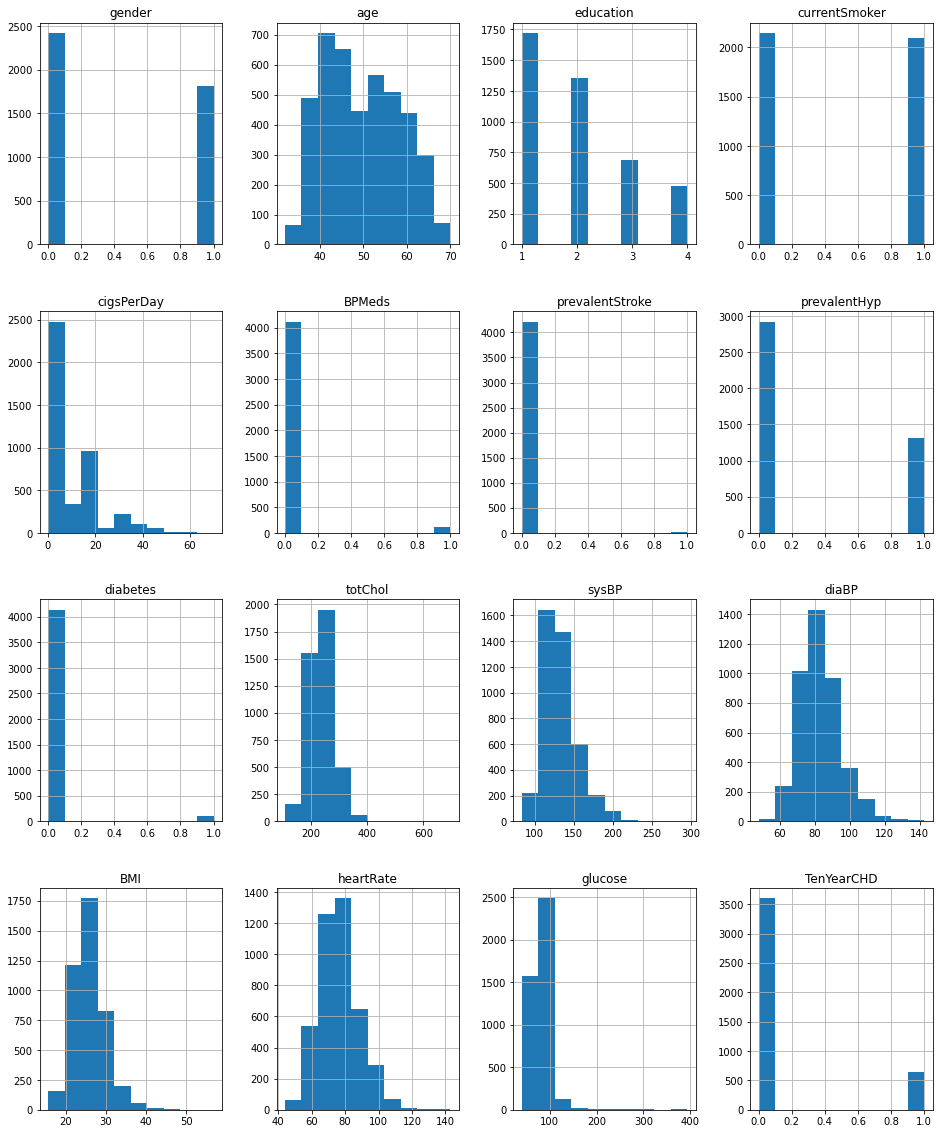

In [152]:
df2.hist(figsize=(16,20))

<AxesSubplot:>

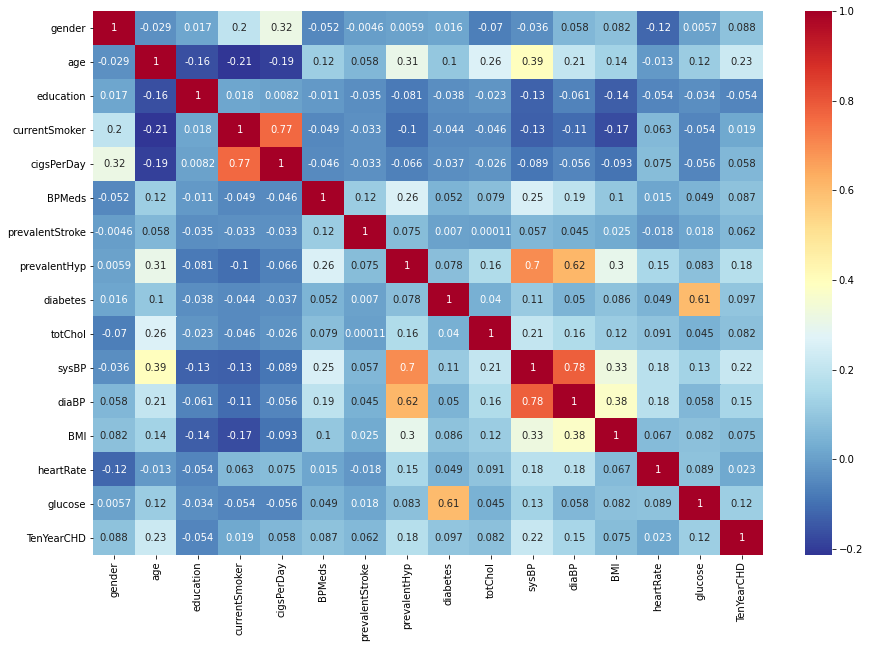

In [153]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True, cmap='RdYlBu_r')

In [154]:
new_df=df2.copy()

In [155]:

new_df['log_cigsPerDay'] = np.log1p(new_df['cigsPerDay'])
new_df['log_totChol'] = np.log1p(new_df['totChol'])

new_df['log_sysBP'] = np.log1p(new_df['sysBP'])
new_df['log_diaBP'] = np.log1p(new_df['diaBP'])
new_df['log_BMI'] = np.log1p(new_df['BMI'])
new_df['log_heartRate'] = np.log1p(new_df['heartRate'])
new_df['log_glucose'] = np.log1p(new_df['glucose'])
new_df['log_age'] = np.log1p(new_df['age'])

new_df.drop(['cigsPerDay','totChol', 'diaBP', 'BMI', 'BMI', 'heartRate', 'glucose', 'age', 'sysBP', 'education', 'BPMeds', 'prevalentStroke', 'diabetes'], axis=1, inplace=True)

In [156]:
new_df.head()

,gender,currentSmoker,prevalentHyp,TenYearCHD,log_cigsPerDay,log_totChol,log_sysBP,log_diaBP,log_BMI,log_heartRate,log_glucose,log_age
0,1,0,0,0,0.000000,5.278115,4.672829,4.262680,3.331133,4.394449,4.356709,3.688879
1,0,0,0,0,0.000000,5.525453,4.804021,4.406719,3.392157,4.564348,4.343805,3.850148
2,1,1,0,0,3.044522,5.505332,4.855929,4.394449,3.271089,4.330733,4.262680,3.891820
3,0,1,1,1,3.433987,5.420535,5.017280,4.564348,3.387098,4.189655,4.644391,4.127134
4,0,1,0,0,3.178054,5.655992,4.875197,4.442651,3.182212,4.454347,4.454347,3.850148


In [157]:

new_names = {'male':'gender',
              'log_cigsPerDay':'cigsPerDay',
              'log_totChol':'totChol',
              'log_sysBP':'sysBP',
              'log_diaBP':'diaBP', 
              'log_BMI':'BMI',
              'log_heartRate':'heartRate',
              'log_glucose':'glucose',
              'log_age':'age'}
new_df.rename(columns=new_names,inplace=True)

In [158]:
new_df.head()

,gender,currentSmoker,prevalentHyp,TenYearCHD,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,age
0,1,0,0,0,0.000000,5.278115,4.672829,4.262680,3.331133,4.394449,4.356709,3.688879
1,0,0,0,0,0.000000,5.525453,4.804021,4.406719,3.392157,4.564348,4.343805,3.850148
2,1,1,0,0,3.044522,5.505332,4.855929,4.394449,3.271089,4.330733,4.262680,3.891820
3,0,1,1,1,3.433987,5.420535,5.017280,4.564348,3.387098,4.189655,4.644391,4.127134
4,0,1,0,0,3.178054,5.655992,4.875197,4.442651,3.182212,4.454347,4.454347,3.850148


In [159]:
X= new_df.drop(['TenYearCHD'], axis=1)
y= new_df['TenYearCHD']
X.head()

,gender,currentSmoker,prevalentHyp,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,age
0,1,0,0,0.000000,5.278115,4.672829,4.262680,3.331133,4.394449,4.356709,3.688879
1,0,0,0,0.000000,5.525453,4.804021,4.406719,3.392157,4.564348,4.343805,3.850148
2,1,1,0,3.044522,5.505332,4.855929,4.394449,3.271089,4.330733,4.262680,3.891820
3,0,1,1,3.433987,5.420535,5.017280,4.564348,3.387098,4.189655,4.644391,4.127134
4,0,1,0,3.178054,5.655992,4.875197,4.442651,3.182212,4.454347,4.454347,3.850148


In [30]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3180, 11)
X_test:  (1060, 11)
y_train:  (3180,)
y_test:  (1060,)


param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = xgb(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train.values,y_train.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

param_test2 = {'max_depth':range(1,5,2), 'min_samples_split':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = xgb(learning_rate=0.1, n_estimators=40, min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train.values,y_train.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

param_test3 = {'min_samples_leaf':range(30,71,10)}
gsearch1 = GridSearchCV(estimator = xgb(learning_rate=0.1, n_estimators=40, min_samples_split=150,max_depth=3,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train.values,y_train.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

param_test4 = {'max_features':range(1,17,2)}
gsearch1 = GridSearchCV(estimator = xgb(learning_rate=0.1,n_estimators=40, min_samples_split=150,max_depth=3,min_samples_leaf=50,subsample=0.8,random_state=10), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train.values,y_train.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

param_test5 = {'subsample':[0.5,0.55,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1,1.5,1.1]}
gsearch1 = GridSearchCV(estimator = xgb(learning_rate=0.02,n_estimators=200,min_samples_split=150,max_depth=3,min_samples_leaf=50,max_features='sqrt',random_state=10), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(X_train.values,y_train.values)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

In [164]:
classifier = xgb(learning_rate=0.025,n_estimators=160,min_samples_split=150,max_depth=3,min_samples_leaf=50,max_features='sqrt',subsample=0.9,random_state=10)
model = classifier.fit(X_train.values, y_train.values)

In [165]:
prediction = model.predict(X_test.values)
print(prediction)

[0 0 0 ... 0 0 0]


In [166]:
print("Model Accuracy Score:", accuracy_score(y_test, prediction))

Model Accuracy Score: 0.8415094339622642


In [167]:
import sklearn.externals
import joblib

In [168]:
joblib.dump(model, 'HeartModel.pkl')

['HeartModel.pkl']

In [134]:
modelReload = joblib.load('HeartModel.pkl')

In [135]:
saved_prediction=modelReload.predict(X_test)
print(saved_prediction)

[0 0 0 ... 0 0 0]


In [136]:
print("Model Accuracy Score:", accuracy_score(y_test, saved_prediction))

Model Accuracy Score: 0.8556603773584905


In [137]:
temp={}
temp['gender'] = 0
temp['age'] = 20
temp['cigsPerDay'] = 2
temp['currentSmoker'] = 0
temp['prevalentHyp'] = 1
temp['totChol'] = 0
temp['sysBP'] = 90
temp['diaBP'] = 75
temp['BMI'] = 27
temp['heartRate'] = 80
temp['glucose'] = 75
print(temp)

{'gender': 0, 'age': 20, 'cigsPerDay': 2, 'currentSmoker': 0, 'prevalentHyp': 1, 'totChol': 0, 'sysBP': 90, 'diaBP': 75, 'BMI': 27, 'heartRate': 80, 'glucose': 75}


In [138]:
test_data=pd.DataFrame({'x':temp}).transpose()
test_data

,BMI,age,cigsPerDay,currentSmoker,diaBP,gender,glucose,heartRate,prevalentHyp,sysBP,totChol
x,27,20,2,0,75,0,75,80,1,90,0


In [139]:
modelReload.predict(test_data)[0]

0